# Setup and grab data

In [42]:
import torch
import os
import numpy as np
from matplotlib import pyplot as plt
import torchvision
import tensorflow as tf
import cv2
import imghdr

In [63]:
data_dir = 'data'
image_ext = ['jpeg','jpg','png']

In [77]:
for label in os.listdir(data_dir):
    for file in os.listdir(os.path.join(data_dir,label)):
        file_path = os.path.join(data_dir,label,file)
        try:
            img = cv2.imread(file_path)
            tip = imghdr.what(file_path)
            if tip not in image_ext:
                print(f'File name: {file_path} is not an image')
                    # os.remove(file_path)
        except Exception as e:
            print(f'File name: {file_path} encounter error')
            

File name: data\mask\african-man-medical-mask-on-260nw-1690472443.jpg is not an image
File name: data\mask\Women-wearing-facemasks-while-walking-outdoors-Milan-Italy-February-2020-coronavirus-COVID-19.jpg is not an image
File name: data\no_mask\12-how-to-draw-a-human-face.jpg.webp is not an image
File name: data\no_mask\1200px-Human_faces.jpg is not an image
File name: data\no_mask\arab-man-portrait-260nw-409360072.jpg is not an image
File name: data\no_mask\close-photo-charming-guy-entrepreneur-260nw-1531460651.jpg is not an image
File name: data\no_mask\hispanic-man-beard-standing-over-260nw-2291529025.jpg is not an image
File name: data\no_mask\image-handsome-smiling-young-african-600nw-722913181.jpg is not an image
File name: data\no_mask\studio-portrait-happy-young-man-260nw-1969932604.jpg is not an image
File name: data\no_mask\young-asian-man-close-shot-600nw-1562907988.jpg is not an image


# Model preprocessing

In [83]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 307 files belonging to 2 classes.


In [85]:
data_iterator = data.as_numpy_iterator()

In [88]:
batch = data_iterator.next()

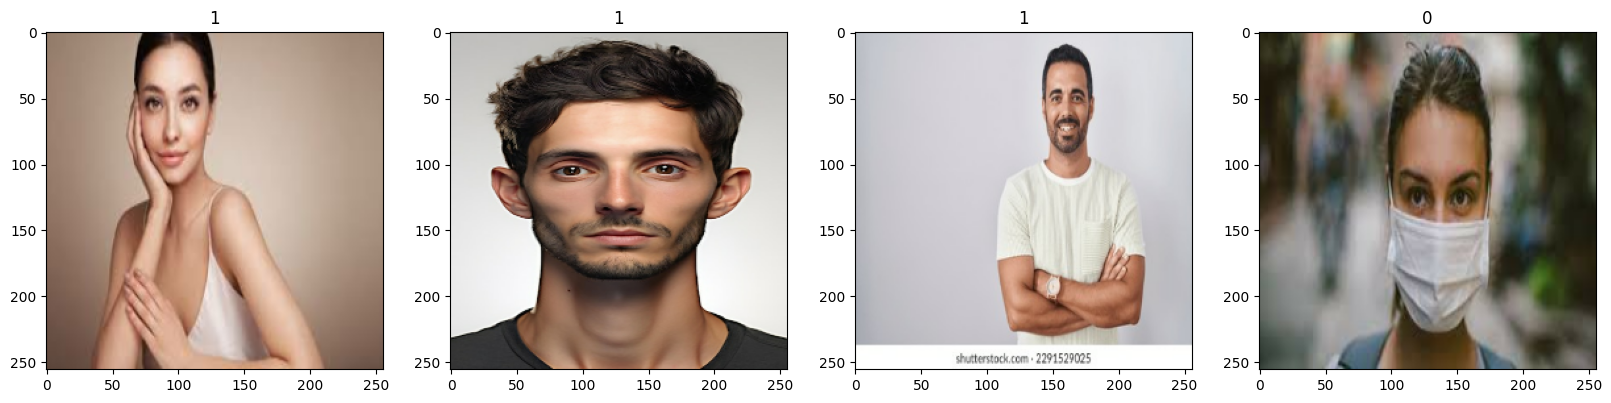

In [89]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [90]:
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

(array([[[[8.49754930e-01, 8.49754930e-01, 8.49754930e-01],
          [8.50980401e-01, 8.50980401e-01, 8.50980401e-01],
          [8.54901969e-01, 8.54901969e-01, 8.54901969e-01],
          ...,
          [8.45304847e-01, 8.45304847e-01, 8.45304847e-01],
          [8.47058833e-01, 8.47058833e-01, 8.47058833e-01],
          [8.27450991e-01, 8.27450991e-01, 8.27450991e-01]],
 
         [[8.43137264e-01, 8.43137264e-01, 8.43137264e-01],
          [8.45718443e-01, 8.45718443e-01, 8.45718443e-01],
          [8.50980401e-01, 8.50980401e-01, 8.50980401e-01],
          ...,
          [8.49528491e-01, 8.49528491e-01, 8.49528491e-01],
          [8.44477654e-01, 8.44477654e-01, 8.44477654e-01],
          [8.30147088e-01, 8.30147088e-01, 8.30147088e-01]],
 
         [[8.43137264e-01, 8.43137264e-01, 8.43137264e-01],
          [8.47927690e-01, 8.47927690e-01, 8.47927690e-01],
          [8.50980401e-01, 8.50980401e-01, 8.50980401e-01],
          ...,
          [8.50980401e-01, 8.50980401e-01, 8.5098

In [91]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [93]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Build and train model

In [94]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [95]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [96]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [97]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 11s 1s/step - loss: 0.8316 - accuracy: 0.4821 - val_loss: 0.6315 - val_accuracy: 0.5938
Epoch 2/20
7/7 [==============================] - 9s 1s/step - loss: 0.6336 - accuracy: 0.6429 - val_loss: 0.5912 - val_accuracy: 0.8438
Epoch 3/20
7/7 [==============================] - 10s 1s/step - loss: 0.4993 - accuracy: 0.7857 - val_loss: 0.3037 - val_accuracy: 0.9219
Epoch 4/20
7/7 [==============================] - 9s 1s/step - loss: 0.4336 - accuracy: 0.7991 - val_loss: 0.2967 - val_accuracy: 0.8438
Epoch 5/20
7/7 [==============================] - 9s 1s/step - loss: 0.2961 - accuracy: 0.8705 - val_loss: 0.2522 - val_accuracy: 0.8906
Epoch 6/20
7/7 [==============================] - 9s 1s/step - loss: 0.2480 - accuracy: 0.8973 - val_loss: 0.1941 - val_accuracy: 0.9062
Epoch 7/20
7/7 [==============================] - 9s 1s/step - loss: 0.1819 - accuracy: 0.9241 - val_loss: 0.0833 - val_accuracy: 0.9844
Epoch 8/20
7/7 [=======================

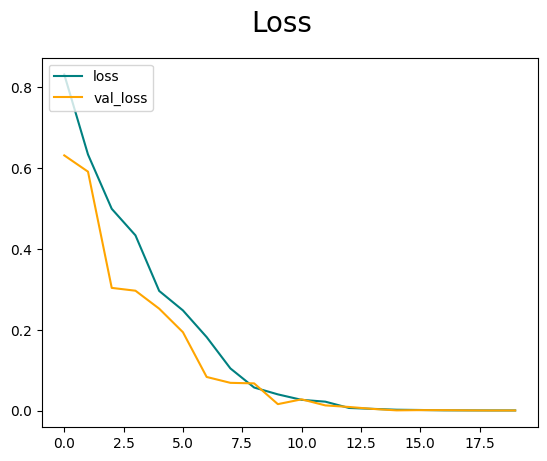

In [98]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

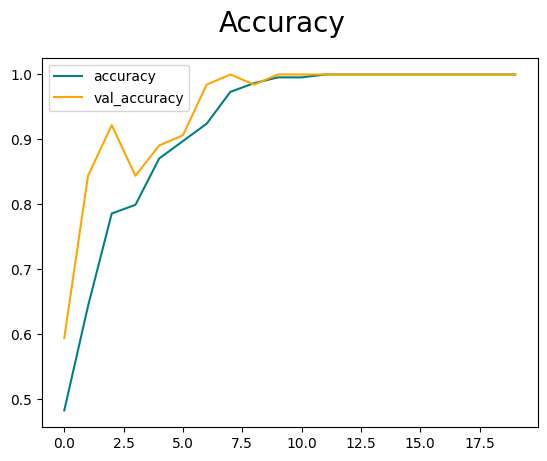

In [99]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [103]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [104]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [105]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 169ms/step


In [106]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# Save model

In [107]:
from tensorflow.keras.models import load_model

In [108]:
model.save(os.path.join('models','imageclassifier.h5'))

C:\Users\User\anaconda3\envs\Computer_vision\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
